# Exercises and Homework for week 5

**Your group number here please:**  Group 02
Ajay, Areti & Vlera

## 1. Lecture Review (0 points)

N/A

## 2. Plots of vector fields (0 points)
Please study the notebook [04_vector_fields_matplotlib.ipynb](04_vector_fields_matplotlib.ipynb) to plot vector fields with `matplotlib`. You will need it in task 3.

N/A

<a id='plate_condensator'></a>
## 3. Electric field of a parallel-plate condensator (15 points)
You learned about the parallel-plate condensator and its electric field in your experimental and theoretical physics classes. To start, you assume that the electric field within the condensator is homegeneous within the condensator:
<img src="figs/condensator_simple.png" style="height: 200px;">

In this exercise, we want to calculate the electric field within a bounded, two-dimensional region. You know from your theoretical physics classes that the electrical field $\vec{E}(x, y)$ within a region, free of charges, can be obtained from the electric potential $\Phi(x, y)$ via $\vec{E}(x, y)=-\nabla\Phi(x, y)$. The electric potential in turn is covered by the two-dimensial Laplace equation:
$$
\Delta \Phi(x, y)=0.
$$
Please have a look at [Wikipedia](https://en.wikipedia.org/wiki/Mathematical_descriptions_of_the_electromagnetic_field) if you would like to fresh up your knowledge on electric fields, Maxwells equations and the like.

The setup for this exercise is as follows:

<img src="figs/condensator_layout.png" style="height: 300px;">

We are given a bounded region as shown above and two condensator plates whose electric potentials are constant at $\Phi=\pm 1$. The potential at the boundary is constant at zero. To justify the latter condition, the condensator plates must be away far enough from the boundaries. For our purposes, the configuration above fulfills this condition. 

Your task is to determine the potential in the interior such that it fulfills the boundary conditions and $\Delta\Phi(x,y)=0$ everywhere else.

### An iteration scheme to solve Laplaces equation with boundary conditions
For our setup, we can numerically solve the equation $\Delta\Phi(x, y)=0$ in a region with boundary conditions as follows:
1. We put a regular, two-dimensional grid of points on our region. Individual points are separated in $x$ and $y$ by $h_x$ and $h_y$ respectively. We will assume henceforth that $h=h_x=h_y$.
2. $$ \Delta\Phi(x, y) = \frac{\partial}{\partial x^2}\Phi(x, y) + \frac{\partial}{\partial y^2}\Phi(x, y).$$
We can numerically approximate the second derivatives via:
$$
\frac{\partial}{\partial x^2}\Phi(x, y) = \frac{\Phi(x+h, y)-2\Phi(x, y)+\Phi(x-h,y)}{h^2} + \cal{O}(h^2)
$$
and similarily
$$ \frac{\partial}{\partial y^2}\Phi(x, y) = \frac{\Phi(x, y+h)-2\Phi(x, y)+\Phi(x,y-h)}{h^2} + \cal{O}(h^2)
$$
With $\Delta\Phi(x, y)=0$, we obtain by neglecting higher-order terms:
$$
\Phi(x, y) = \frac 14(\Phi(x+h, y) + \Phi(x-h, y) + \Phi(x, y+h) + \Phi(x, y-h)).
$$
3. The formulas in (2.) allow us the construction of an iteration scheme:
  1. Set $\Phi_0(x, y)$ to fulfill the boundary conditions and set it equal to zero everywhere else.
  2. Calculate $\Phi_1(x, y) = \frac 14(\Phi_0(x+h, y) + \Phi_0(x-h, y) + \Phi_0(x, y+h) + \Phi_0(x, y-h))$. Hereby, you need to ensure that $\Phi_1(x, y)$ still fulfills the boundary conditions!
  3. Repeat step (2.). i.e. calculate $\Phi_{n+1}(x, y) = \frac 14(\Phi_n(x+h, y) + \Phi_n(x-h, y) + \Phi_n(x, y+h) + \Phi_n(x, y-h))$ until you reach convergence. We want to define convergence via $\max \left|\Phi_{n+1}(x, y) - \Phi_{n}(x, y)\right| < 1.0\cdot 10^{-4}$, where the maximum is taken over all grid-points.

### Your tasks

Please write a program to implement the scheme above and to visualise the electric field of the parallel-plate condensator.

1. Define your two-dimensional coordinate grid as shown above with 101 points in the $x$ and the $y$ dimensions.

   **Note:** 101 points ensure a nice coverage of the interval $[0, 1]$ with points when using `np.linspace(0.0, 1.0, 101)`. To make this clear, consider the lower resolution case with 11 points:
   ```
   a = np.linspace(0.0, 1.0, 11)
   print(a)
   array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])
   ```
2. I placed my condensator plates at $x_{left}=0.35$ and $x_{right}=0.65$. The extent in $y$ is $y_{low} = 0.35$ and $y_{high}=0.65$ but please feel free to experiment with other choices.
3. Implement the iteration scheme above *without* any `for`-loops over the grid points but use `numpy`-slicing instead!
4. Once you have estimated the potential $\Phi(x,y)$, calculate the electric field via $\vec{E}(x, y)=-\nabla\Phi(x, y)$ and visualise it. Please have a look at [this notebook](04_vector_fields_matplotlib.ipynb) to learn some basics on vector-plots with `matplotlib`.

In [1]:
#task 1
import numpy as np
import matplotlib.pyplot as plt

#construct a 2D grid
codi = np.linspace(0., 1., 101)
X, Y = np.meshgrid(codi, codi)
dh = codi[1] - codi[0]

In [2]:
#task 2, 3
phi = 0 * X

#initialise capacitor plate potential for the given plate coordinates
phi[35:65, 35] = -1
phi[35:65, 65] = 1

i = 0 #variable to check the number of iterations
while (True):
    #we use a condition that's a tutology since we can check for the loop break condition 
    #only after running the iteration at least once.
    #we could've run the iteration once outside the loop and checked for the loop break condition within 'while()'
    #but instead, we check for the loop break condition at the end of every iteration and break when the condition is met.
    i += 1 #update iteration number
    phi_old = np.copy(phi) #use np.copy to overcome pointer errors 
    #(using a direct assignment results in an error due to the way how python handles pointers in such cases)
    phi[1:-1, 1:-1] = (1/4)*(phi[2:,1:-1] + phi[0:-2,1:-1] + phi[1:-1, 2:] + phi[1:-1, 0:-2]) #update all the interior points
    #update capacitor plate potentials to the initial values
    phi[35:65, 35] = -1
    phi[35:65, 65] = 1
    #check for loop break condition
    if np.max(np.abs(phi - phi_old)) < 1.0E-4:
        print("Number of iterations:", i)
        break
    #break if something goes wrong (for example, the solution doesn't converge) and the loop becomes an infinite loop
    #this should not happen in our case as the equation we start with converges anaytically, hence it should converge numerically
    #but still, this is a good check to have
    if i > 100000:
        print("Oops, something's not right")
        print("Maximum iterations exceeded")
        break

Number of iterations: 1111


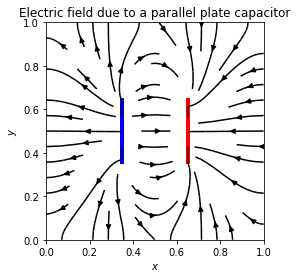

In [3]:
#task 4
#calculate the gradient of the potential
Ey, Ex = np.gradient(phi, dh, dh)

#plotting
fig, ax = plt.subplots()
ax.set_aspect('equal') #equal scaling for x and y axes

#plot two vertical lines to denote the two plates of the capacitor
ax.vlines(x=0.35, ymin=0.35, ymax=0.65, linewidth=4, color='blue')
ax.vlines(x=0.65, ymin=0.35, ymax=0.65, linewidth=4, color='red')
#plot the electric field
ax.streamplot(X, Y, Ex, Ey, density=0.5, color= 'black')

ax.set_xlabel(r'$x$') #x axis title
ax.set_ylabel(r'$y$') #y axis title
plt.title('Electric field due to a parallel plate capacitor') #plot title
plt.show()

**Remarks:**  
The plot we have above neatly resembles the electric field due to a parallel plate capacitor. The electric field lines in the region in between the plates and closer to the midpoint of the plates are perfectly perpendicular to the plates. As we move away from the midpoint of the plate, edge effects start affecting our result and the electric fields are no longer perfectly perpendicular. We can also check this by printing the values of the electric field in this region.

## 4. Word doubling (15 points)

This task results in a very practical program which you can use when you write your next larger text (thesis, publication etc.).

When writing a text, we often make the mistake to repeat a word.

   ```
   When typing longer texts, we often often make the mistake to
   repeat individual words such as here here.

   ```
   
Write a program which reads a text file and marks positions with such mistakes. You should print lines and linenumbers with double words. Consider also cases where a word doubling occurs directly before and after a line break.

You can find a short example text for test purposes [here](data/double_words.txt).

**Note:**
An obvious ansatz for the problem is to read a line, to split it according to spaces, tabulators and line breaks and to perform the double word test. This, however is no complete solution to the problem! Consider again the above example:

   ```
   ... such as here here.
   ```
   
The double word `here` would not be recognised because the second one is directly followed by a dot (end of sentence mark). There are similar issues with other punctuation marks such as semicolons, parentheses and so on. See the following cell for a possibility to take this into account.

**Example:** The [example text](data/double_words.txt) gives the follwing output with my code:
```
Repetition in line 1. Word "often" at position 6!
Repetition in line 2. Word "here" at position 6!
Repetition of the first word "words" on line 5. It occured at the end of the previous (non-empty) line!
Repetition of the first word "test" on line 9. It occured at the end of the previous (non-empty) line!

```

In [4]:
# example to split a string into words taking into account
# (removing) punctuation.
# For time reasons, we will not treat 'regular expressions' in class
# but you should look them up yourself! You should know them from
# Linux already.

import re # module to handle regular expressions in a Python program

s = "Here some text with double (double!) words words. It also contains puctuation!"

# split s into its words without the punctuation marks; note that
# you might end up with empty strings in the word list!
words = re.split('\W+', s.rstrip())

print(words)

['Here', 'some', 'text', 'with', 'double', 'double', 'words', 'words', 'It', 'also', 'contains', 'puctuation', '']


In [5]:
#function based on the above method to split a sentence into words
def respl(string):
    """This function takes in a sentence (string) and returns a list of words without any special characters"""
    return re.split('\W+', string.rstrip())

text = [] #list to store the lines as a list
lines = [] #list to split and store every sentence into words

#open a text file in read mode and store the lines in a list
with open(r'./double_words.txt', 'r') as file:
    text = file.readlines() #this returns a list with every element of the list being a line
    
#for loop to iterate over the lines and split them into words
for i in range(len(text)):
    lines.append(respl(text[i])) #every element of a list is a list of splits words of a line
    
pos = [] #list to store the positions of repetitions
#check for repetitions within a line
for i in range(len(lines)):
    for j in range(len(lines[i]) -1):
        if (lines[i][j] == lines[i][j+1]) and (lines[i][j] != ''):
            pos.append([i, j]) #if two consecutive words match, append them to a list
            #we also check if they are non-empty strings. This is needed because, if we have two consecutive special characters
            #separated by spaces(e.g., 'hello # $ world'), our method counts # and $ as repetitions, since the function respl returns
            #empty strings at those positions.

#check for repetitions at the end of a line and the beginning of the next line
for i in range(len(lines) - 1):
    if (lines[i][len(lines[i]) - 1] == lines[i+1][0]) and (lines[i+1][0] != ''):
        pos.append([i,len(lines[i]) -1]) #if the last word of a line and the first word of the next line are the same, append them to a list
        #we also check if they are non-empty strings. This is needed because the cases like where we have consecutive empty lines
        #will be counted as repetitions otherwise. If a line ends with a special character and if the next line is empty,
        #this will be counted as a repetition too, if we don't check for empty strings.

#the list pos already contains the positions - line number and position - of every repetition, but they're not sorted.
#the following step is not absolutely necessary, and it is included only to make the result more presentable
#the following lines basically converts the pos list to a numpy array (so that we have better and easier ways to sort it)
#and sorts the indices based on the first column, and if they match, then the second column
pos = np.array(pos) #convert to array
ind = np.lexsort(([pos[:,1], pos[:,0]])) #sort the array. e.g., ind = [0, 2, 1] means pos is sorted as pos[0], pos[2], pos[1]
#note that this step doesn't produce any difference in the case of the file, 'double_words.txt'
#but this will be a nice generalisation to such a code
pos = pos[ind]

#print the results
for i in range(len(pos)):
    print("Repetition at line", pos[i, 0], "position", pos[i, 1], ". Repeated word:", lines[pos[i, 0]][pos[i, 1]])

Repetition at line 0 position 5 . Repeated word: often
Repetition at line 1 position 5 . Repeated word: here
Repetition at line 3 position 4 . Repeated word: words


**Remarks:**  
It should be noted that the above code checks every word for an exact match. For example, the words, "Hello" and "hello" are considered different. In other words the code is case sensitive, when it comes to repetitions of characters. This is much more difficult to overcome since ASCII encodes different cases differently. While it is possible to check letters for cases, it is much more involved. We do not try that since it is not a part of the problem. This "failure" is actually a boon, since legitimated sentences like " ... here. Here, ..." will not be marked as a repetition, but genuine mistakes will go unmarked. This example also shows us the complexity of this case.  
It should also be noted that the above code will fail when you have a special character sandwiched between two same words, for example, "hello-hello" (or even something like, "hello . hello"). This will return a repetition. Such cases are actually fairly common in English, and again, it is possible to check for this case separately. This has not been done here, but could be a part of a future "update" to this code.  
To summarise, the code essentially checks for word repetitions at consecutive positions and at the end and the beginning of consecutive lines. While it is true that it returns false repetitions (in certain cases), it obviously does not neglect true repetitions (within the constraint of case sensitivity).